


# Project: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

### Qustions to explore
>  Questions: 
   > - The highest purchages record happened in which state for the persons under 18 years, percent on April 1, 2010?
   > - What state is most associated with high gun per capita in 2010 and 2016?
   > - What is the estimated number of civilians gun registration per capita by states in 2010 and 2016?
   > - Which states have had the highest growth in gun registrations? 
   > - What is the overall trend of gun purchases?
   

In [5]:
# This cell to set up import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

gun_data = pd.read_csv('gun_data.csv')
census_data = pd.read_csv('census_data.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
census_data.shape

(85, 52)

In [35]:
gun_data['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

> look like there are some states are in gun data but not in the census data so we will drop them later 

In [6]:
census_data.shape , gun_data.shape

((85, 52), (12485, 27))

In [55]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,11348.000000,1000.000000,11350.000000,11350.000000,5000.000000,11350.000000,11348.000000,9597.000000,9595.000000,4650.000000,...,1650.000000,900.000000,750.000000,2500.000000,2500.000000,2500.000000,2250.000000,2500.000000,2050.000000,11350.000000
mean,7041.630331,1282.552000,6509.303877,8575.439648,396.052400,295.059471,64.675097,5.301969,8.604482,0.181720,...,1.130303,0.084444,0.096000,16.427200,12.763200,1.131600,0.439556,0.484400,0.115610,23734.978502
std,24801.129677,9667.124288,8829.284061,9416.217660,1410.425364,816.710594,633.514277,11.321981,17.067140,1.107227,...,4.587865,0.665018,0.703878,74.529346,56.771827,4.673652,1.511227,1.596113,0.446012,33437.577310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,1327.250000,2778.000000,37.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.000000
50%,814.000000,0.000000,3622.500000,5893.000000,148.000000,151.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14050.000000
75%,5137.750000,1.000000,7987.750000,11021.500000,393.000000,328.750000,0.000000,5.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27537.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [56]:
census_data.describe()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
unique,64,64,63,63,63,62,63,62,63,63,...,64,63,63,63,62,64,64,63,64,63
top,"Population estimates, July 1, 2016, (V2016)","4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,51.10%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,1,2,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [81]:
census_data.index

RangeIndex(start=0, stop=85, step=1)

> Drop the rows that have notes and not tips and not important information 

In [103]:
to_delete = [64 , 65,66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83 , 84]

In [104]:
census_data.drop(to_delete , axis = 0,  inplace = True)

In [105]:
census_data.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
59,"Nonminority-owned firms, 2012",NaN,"272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


> it looke like dact note have no value at all 

In [122]:
census_data.drop('Fact Note' , axis = 1 , inplace = True)

In [117]:
census_data.columns

Index(['Fact', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [19]:
missed_state = []

In [211]:

#for state in columns:
#    gun_data.drop(c , axis = 1 , inplace = True )

gun_data['state'].unique()
for s in gun_data['state'].unique():
    if s not in census_data.columns:
        missed_state.append(s)
missed_state

['District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands']

> drop the missed sates from gun data

In [212]:

for s in missed_state:
    gun_data = gun_data[gun_data.state != s]
gun_data['state'].nunique()

50

census_data has more by one because it has face column 

In [45]:
census_data.shape

(85, 51)

In [50]:
census_data.isna().sum()

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


In [51]:
census_data.duplicated().sum()

0

In [52]:
gun_data.duplicated().sum()

0

In [86]:
gun_data.isna().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [346]:
gun_data['month'] = pd.to_datetime(gun_data['month'])
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      11350 non-null  datetime64[ns]
 1   state                      11350 non-null  object        
 2   permit                     11348 non-null  float64       
 3   permit_recheck             1000 non-null   float64       
 4   handgun                    11350 non-null  float64       
 5   long_gun                   11350 non-null  float64       
 6   other                      5000 non-null   float64       
 7   multiple                   11350 non-null  int64         
 8   admin                      11348 non-null  float64       
 9   prepawn_handgun            9597 non-null   float64       
 10  prepawn_long_gun           9595 non-null   float64       
 11  prepawn_other              4650 non-null   float64       
 12  rede

In [109]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            64 non-null     object
 1   Alabama         64 non-null     object
 2   Alaska          64 non-null     object
 3   Arizona         64 non-null     object
 4   Arkansas        64 non-null     object
 5   California      64 non-null     object
 6   Colorado        64 non-null     object
 7   Connecticut     64 non-null     object
 8   Delaware        64 non-null     object
 9   Florida         64 non-null     object
 10  Georgia         64 non-null     object
 11  Hawaii          64 non-null     object
 12  Idaho           64 non-null     object
 13  Illinois        64 non-null     object
 14  Indiana         64 non-null     object
 15  Iowa            64 non-null     object
 16  Kansas          64 non-null     object
 17  Kentucky        64 non-null     object
 18  Louisiana   

> Change the type of columns in census data so we could make math operation on it

In [137]:
cl = census_data.iloc[: ,1: ].columns
test = census_data.copy()

for c in cl: 
    census_data[c] = census_data[c].str.replace("%" , '')
    census_data[c] = census_data[c].str.replace(',' , '')
    census_data[c] = census_data[c].str.extract(r'(\d+.\d+)')
    census_data[c] = census_data[c].astype(float)

In [138]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact            80 non-null     object 
 1   Alabama         64 non-null     float64
 2   Alaska          62 non-null     float64
 3   Arizona         64 non-null     float64
 4   Arkansas        63 non-null     float64
 5   California      63 non-null     float64
 6   Colorado        64 non-null     float64
 7   Connecticut     64 non-null     float64
 8   Delaware        64 non-null     float64
 9   Florida         64 non-null     float64
 10  Georgia         64 non-null     float64
 11  Hawaii          63 non-null     float64
 12  Idaho           63 non-null     float64
 13  Illinois        64 non-null     float64
 14  Indiana         64 non-null     float64
 15  Iowa            64 non-null     float64
 16  Kansas          64 non-null     float64
 17  Kentucky        63 non-null     float

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### The highest purchages record happened in which state for the persons under 18 years, percent on April 1, 2010?

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [268]:
ans = census_data.iloc[7 , 1:]
ans = pd.to_numeric(ans)
ans.idxmax()

'Utah'

In [270]:
ans.max()

31.5

### What state is most associated with high gun per capita in 2010?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [329]:
#check which columns for the 2010 year
census_data.iloc[1, :]

Fact              Population estimates base, April 1, 2010,  (V2...
Alabama                                                   4780131.0
Alaska                                                     710249.0
Arizona                                                   6392301.0
Arkansas                                                  2916025.0
California                                               37254522.0
Colorado                                                  5029324.0
Connecticut                                               3574114.0
Delaware                                                   897936.0
Florida                                                  18804592.0
Georgia                                                   9688680.0
Hawaii                                                    1360301.0
Idaho                                                     1567650.0
Illinois                                                 12831574.0
Indiana                                         

In [355]:
# sync the states and set it as index so it kinda as groupby state then get the sum of totals for the same state
test = gun_data.copy()
test.set_index('state')
tot_gun_2010 = test[test.month == '2010-04']
tot_gun_2010.set_index('state' , inplace = True)
tot_gun_2010.totals

state
Alabama            20791
Alaska              6411
Arizona            16578
Arkansas           14563
California         80750
Colorado           23609
Connecticut        15922
Delaware            1439
Florida            42794
Georgia            24065
Hawaii               963
Idaho               7814
Illinois           53929
Indiana            25232
Iowa                9720
Kansas              9529
Kentucky          211261
Louisiana          13373
Maine               5073
Maryland            6992
Massachusetts       8748
Michigan           29383
Minnesota          26351
Mississippi         9702
Missouri           26289
Montana             8367
Nebraska            4141
Nevada              9294
New Hampshire       6911
New Jersey          4215
New Mexico          8599
New York           19906
North Carolina     23378
North Dakota        3726
Ohio               31312
Oklahoma           17750
Oregon             16031
Pennsylvania       50249
Rhode Island        1199
South Carolina     

In [315]:
# Use assertation function to confirm 'state' columns' elements from both dataframe are idental 
state_data_2010 = census_data.iloc[1,1:]
assert(tot_gun_2010.index.tolist() == state_data_2010.index.tolist())

In [321]:
#check the highest state that have gun per capita 
avg_2010 = tot_gun_2010.totals / state_data_2010
avg_2010.astype(float).idxmax()

'Kentucky'

In [361]:
#and its value 
avg_2010.max()


0.04868500860959629

### What state is most associated with high gun per capita in 2016?

In [333]:
state_data_2016 = census_data.iloc[0,1:]
state_data_2016

Alabama            4863300.0
Alaska              741894.0
Arizona            6931071.0
Arkansas           2988248.0
California        39250017.0
Colorado           5540545.0
Connecticut        3576452.0
Delaware            952065.0
Florida           20612439.0
Georgia           10310371.0
Hawaii             1428557.0
Idaho              1683140.0
Illinois          12801539.0
Indiana            6633053.0
Iowa               3134693.0
Kansas             2907289.0
Kentucky           4436974.0
Louisiana          4681666.0
Maine              1331479.0
Maryland           6016447.0
Massachusetts      6811779.0
Michigan           9928300.0
Minnesota          5519952.0
Mississippi        2988726.0
Missouri           6093000.0
Montana            1042520.0
Nebraska           1907116.0
Nevada             2940058.0
New Hampshire      1334795.0
New Jersey         8944469.0
New Mexico         2081015.0
New York          19745289.0
North Carolina    10146788.0
North Dakota        757952.0
Ohio          

In [357]:
tot_gun_2016 = test[test.month == '2016-06-01']
tot_gun_2016.set_index('state' , inplace = True)
tot_gun_2016.totals

state
Alabama            44976
Alaska              7406
Arizona            32540
Arkansas           18779
California        173846
Colorado           41134
Connecticut        33475
Delaware            4987
Florida           125567
Georgia            42626
Hawaii              1754
Idaho              12947
Illinois          164500
Indiana            94326
Iowa               12209
Kansas             12364
Kentucky          360293
Louisiana          26278
Maine               7858
Maryland           11647
Massachusetts      17743
Michigan           39580
Minnesota          47916
Mississippi        17507
Missouri           45384
Montana            10610
Nebraska            5777
Nevada             11771
New Hampshire      12661
New Jersey         10806
New Mexico         12560
New York           28472
North Carolina     44535
North Dakota        6568
Ohio               60366
Oklahoma           26167
Oregon             25502
Pennsylvania       80806
Rhode Island        2302
South Carolina     

In [358]:
#check the highest state that have gun per capita 
avg_2016 = tot_gun_2016.totals / state_data_2016
avg_2016.astype(float).idxmax()

'Kentucky'

In [360]:
avg_2016.max()

0.08120241407770251

it look like kentucky have a safty crice :"

### What is the estimated number of civilians gun registration per capita by states in 2010 and 2016?

In [396]:
# first i want the total of all satate in 2010 and 2016 and the gun data for all states
all_2010 = census_data.iloc[1,1:]
all_2016 = census_data.iloc[0,1:]
test = gun_data.copy()
l = [ 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other']
test.drop(l , axis = 1 , inplace = True)
gun_2010 = test[test.month == '2010-04-01'].totals.sum()
gun_2010
gun_2016 = test[test.month == '2016-06-01'].totals.sum()


308156339.0

In [407]:
# Convert to a percentage 
def to_percent(value):
    if value > 0.001:
        result = value *100
    return result 

In [408]:
capita_2010 = gun_2010 / all_2010.sum()
to_percent(capita_2010) 

0.3978133320178106

In [409]:
capita_2016 = gun_2016/all_2016.sum()
to_percent(capita_2016)

0.6579987790402696

In [420]:
def draw_plot(x , y , x_lable = 'x' , y_lable = 'y' , title = 'title'):
    plt.title(title)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.plot(x, y)
    plt.show()
    

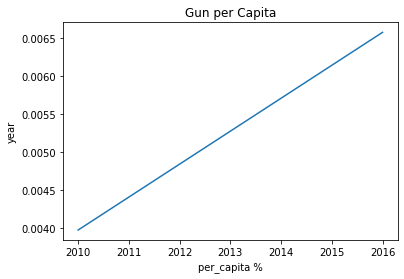

In [421]:
years = [2010 , 2016]
capitas = [capita_2010 , capita_2016]
draw_plot(years , capitas , x_lable = 'per_capita %', y_lable = 'year' , title ='Gun per Capita' )

> it's look like that the gun per capita is increasing by time as :
> - in 2010 it was 0,39781 % 
> - in 2016 it became 0,657998 %

### Which states have had the highest growth in gun registrations?

In [6]:
#to check the growth we should detrimne the date we will check about in this case since the first and last date
#then we dicrease the min total from the max total to get the hightes change 
gun_all = gun_data.copy()
gun_all.set_index('state' , inplace = True)
gun_all['month'] = pd.to_datetime(gun_all['month'])
gun_all.month

state
Alabama         2017-09-01
Alaska          2017-09-01
Arizona         2017-09-01
Arkansas        2017-09-01
California      2017-09-01
                   ...    
Virginia        1998-11-01
Washington      1998-11-01
West Virginia   1998-11-01
Wisconsin       1998-11-01
Wyoming         1998-11-01
Name: month, Length: 12485, dtype: datetime64[ns]

In [7]:

cur_date = gun_all.month.max()
start_date = gun_all.month.min()

In [8]:
grow_tot = gun_all[gun_all.month == cur_date].totals - gun_all.loc[gun_all.month == start_date].totals

397866
Kentucky


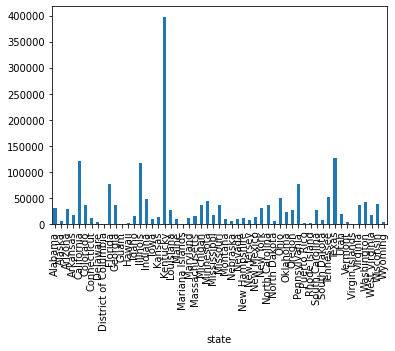

In [9]:
grow_tot.plot(x = grow_tot.index , y = grow_tot , kind = 'bar' );
#plt.hist(x = grow_tot , label = 'test');
print(grow_tot.max())
print(grow_tot.idxmax())


In [20]:
# the top 10 states are 
grow_tot.sort_values(ascending = False )

state
Kentucky                397866
Texas                   125466
California              121405
Illinois                116427
Pennsylvania             76986
Florida                  76578
Tennessee                50838
Ohio                     48990
Indiana                  48177
Minnesota                44233
Washington               42688
Wisconsin                37265
Missouri                 36993
Virginia                 36422
North Carolina           36015
Michigan                 35919
Georgia                  35309
Colorado                 35251
Alabama                  30957
New York                 30384
Arizona                  28015
Louisiana                27022
Oregon                   26933
South Carolina           25924
Oklahoma                 22738
Utah                     19774
Arkansas                 17158
Mississippi              16707
West Virginia            16315
Massachusetts            15417
Idaho                    14762
Kansas                   12458
Ne

> the top 10 states are:  
> - Kentucky  :              397866
> - Texas      :             125466
> - California  :            121405
> - Illinois     :           116427
> - Pennsylvania  :           76986
> - Florida        :          76578
> - Tennessee       :         50838
> - Ohio             :        48990
> - Indiana           :       48177
> - Minnesota          :      44233

from the chart we can see that kentucky has the most grow in gun per capita 

### What is the overall trend of gun purchases?

In [501]:
gun_data.columns
gunlist = ['handgun', 'long_gun','other', 'multiple']
gun_df=gun_data[gunlist]
purchases = [gun_df.handgun.sum() , gun_df.long_gun.sum() , gun_df.other.sum() , gun_df.multiple.sum()]
purchases

[74053083.0, 97370026.0, 1982594.0, 3353513]

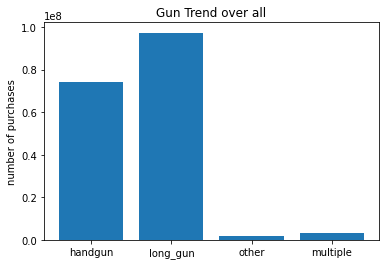

In [512]:
xgun = np.arange(len(gunlist))
plt.xticks(xgun, gunlist );
plt.ylabel('number of purchases')
plt.title('Gun Trend over all')
plt.bar(xgun, purchases )
plt.show();

as we can see that the long gun is the most selling gun over all the data 

## References
> - https://stackoverflow.com/questions/48719937/getting-typeerror-reduction-operation-argmax-not-allowed-for-this-dtype-when
> - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
> - https://sparkbyexamples.com/pandas/pandas-set-index-to-column-in-dataframe/#:~:text=In%20order%20to%20set%20index,row%20of%20the%20pandas%20DataFrame.
> - https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

<a id='conclusions'></a>
## Conclusions

> At the end and in conclusions, the gun and census data shared similar data sucha as states and date comparing and constrsting both data by conuntries and data would give the idea about the gun registration per capita in any year you want like 2010 and 2016 from the above caluclation you found out that the gun registration per capita in 2010 is 0.39% and in 2016 it go up to 0,678 % that mean the gun registration in those states are very high and it go up in a short time i think if the same statistics apply on the day data it would be bigger  

> about the limitation when it comes to there are missing data for some states and not clean data 